In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load The Data

data_location = 'fma_metadata'

albums = pd.read_csv(data_location + '/raw_albums.csv',low_memory = False)

In [21]:
# Format The Data

albums['album_date_released'] = pd.to_datetime(albums['album_date_released'])
albums['album_date_created'] = pd.to_datetime(albums['album_date_created'])

In [22]:
albums.columns.values

array(['album_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites',
       'album_handle', 'album_image_file', 'album_images',
       'album_information', 'album_listens', 'album_producer',
       'album_title', 'album_tracks', 'album_type', 'album_url',
       'artist_name', 'artist_url', 'tags'], dtype=object)

In [42]:
# Analyze the number of tracks per album

tracks_table = albums['album_tracks'].value_counts().to_frame().reset_index()
tracks_table = tracks_table.rename(columns={ 'index' : 'num_tracks', 'album_tracks' : 'frequency' })

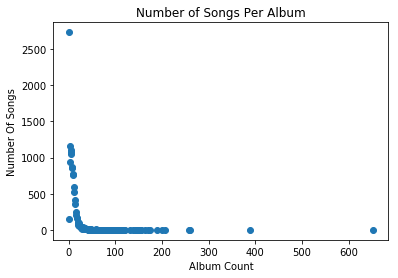

In [43]:
plt.scatter(tracks_table.num_tracks, tracks_table['frequency'])
plt.title('Number of Songs Per Album')
plt.xlabel('Album Count')
plt.ylabel('Number Of Songs')
plt.show()

In [50]:
# Analyze the release date of the albums

release_dates = albums['album_date_released'].value_counts().to_frame().reset_index()
release_dates = release_dates.rename(columns={ 'index' : 'album_date_released', 'album_date_released' : 'album_count' })

release_dates.sort_values('album_date_released', inplace=True)

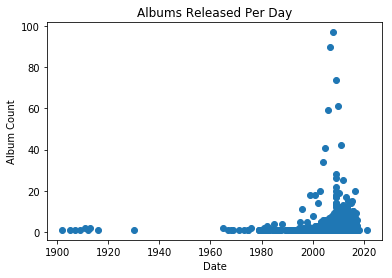

In [53]:
plt.plot_date(release_dates.album_date_released, release_dates.album_count)
plt.title('Albums Released Per Day')
plt.xlabel('Date')
plt.ylabel('Album Count')
plt.show()